# Module 6 Assignment


A few things you should keep in mind when working on assignments:

1. Run the first code cell to import modules needed by this assignment before proceeding to problems.
2. Make sure you fill in any place that says `# YOUR CODE HERE`. Do not write your answer anywhere else other than where it says `# YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.
3. Each problem has an autograder cell below the answer cell. Run the autograder cell to check your answer. If there's anything wrong in your answer, the autograder cell will display error messages.
4. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and Restart & Run all. If the notebook runs through the last code cell without an error message, you've answered all problems correctly.
5. Make sure that you save your work (in the menubar, select File → Save and CheckPoint).

-----

# Run Me First!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_almost_equal, assert_in, assert_is_instance, assert_is_not
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#we import seaborn and use sns.set() to change the plot styling.
import seaborn as sns
sns.set()

# Problem 1: Plotting a function

In this problem you will plot a function.

- Use matplotlib to plot the output of $x^2 + 3 - log(x)$ which is saved in the below variable called $y$.


- Title the plot "Plot of $y = x^2 + 3 - log(x)$"(Hint: use LaTex `Plot of $y = x^2 + 3 - log(x)$`). 


- Label the x-axis as "x".


- Label the y-axis as "y".


- IMPORTANT: Recall that math notation is required to render the title properly. Check the "intro2md" notebook from Module 1 for a refresher on how to do this. Math notation is *not* needed for the x and y axes labels.

In [3]:
# generate x values to calculate the function 
x = np.linspace(0, 2, num=100)

# calculate y
y = x**2 + 3 - np.log(x)

Text(0.5, 1.0, 'Plot of $y = x^2 + 3 - log(x)$')

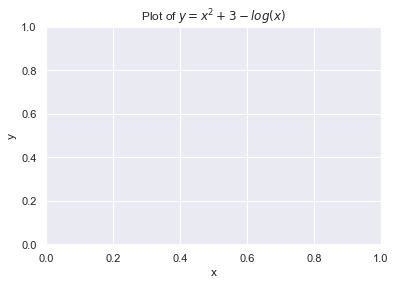

In [4]:
fig, ax = plt.subplots()

# YOUR CODE HERE

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Plot of $y = x^2 + 3 - log(x)$")

In [5]:
assert_equal(ax.get_xlabel(), 'x',msg='The x label is incorrect or missing')
assert_equal(ax.get_ylabel(), 'y',msg='The x label is incorrect or missing')
assert_equal(ax.get_title(), "Plot of $y = x^2 + 3 - log(x)$" ,msg='The title is incorrect or missing')

# Problem 2: Adding legends

Plot two functions, add a legend and color the plots so we know which one is which.

- Use matplotlib to plot the output of $x^2 + 3 - log(x)$ which is saved in the variable $y$ and plot the output of $x^2 + 3 + log(x)$ which is saved in the below variable called $y2$, all on the same plot.

- Name first plot as "subtracting log" and second plot as "adding log"

- Title the plot "Plot of $y = x^2 + 3 - log(x)$ and $y = x^2 + 3 + log(x)$".(Hint: use LaTex)

- Label the x-axis as "x".

- Label the y-axis as "y".

- Change the color of the plot for y2 to red.




In [6]:
# generate x values to calculate the function at
x = np.linspace(0, 2, num=100)

# calculate y
y = x**2 + 3 - np.log(x)
y2 = x**2 + 3 + np.log(x)

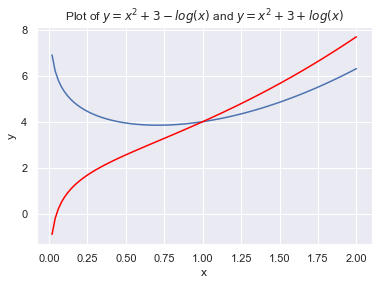

In [7]:
fig, ax = plt.subplots()

# YOUR CODE HERE

ax.plot(x, y, label="subtracting log")
ax.plot(x, y2, label="adding log", color = 'red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Plot of $y = x^2 + 3 - log(x)$ and $y = x^2 + 3 + log(x)$")
plt.show()

In [8]:
assert_equal(ax.get_xlabel(), 'x',msg='The x label is incorrect or missing')
assert_equal(ax.get_ylabel(), 'y',msg='The y label is incorrect or missing')
assert_equal(ax.get_title(), "Plot of $y = x^2 + 3 - log(x)$ and $y = x^2 + 3 + log(x)$",
             msg='The title is incorrect or missing')


if ax.lines[1].get_color() in ['red', 'r']:
    assert_in(ax.lines[1].get_color(), ['red', 'r'], msg='The line for y2 was not colored red')
else:
    assert_in(ax.lines[0].get_color(), ['red', 'r'], msg='The line for y2 was not colored red')

if ax.legend().get_texts()[1].get_text() == 'adding log':
    assert_equal(ax.legend().get_texts()[1].get_text(), 'adding log',
                 msg='The label for y2 is incorrect')
else:
    assert_equal(ax.legend().get_texts()[0].get_text(), 'adding log',msg='The label for y2 is incorrect')

For the next few problems we will use the Dow Jones index data, which is loaded in the below cell. It contains various information about several stocks, including the opening price, the high price, and the closing price for different days.

In [9]:
#Load in the data
df = pd.read_csv('./data/dow_jones_index.data')
#Look at the first 5 rows of the dataset
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


# Problem 3: Plotting the opening price of a stock

In this problem you will create a histogram of the opening price for a stock from the Dow Jones dataset.


- Write a function called "open_histogram" which takes in a dataframe and the ticker name of a stock and outputs a histogram of that stocks opening price using the matplotlib hist function.


- Set the number of bins in the histogram to 20.


- Give the plot a descriptive title.


- Give the plot a descriptive x-axis label.



In [10]:
def open_histogram(df,ticker_name):
    '''
    A function which creates a histogram of the opening price of a given stock from the Dow Jones dataset.
    
    
    Parameters
    -------
    df: a pandas dataframe containing stock price data from the Dow Jones dataset.
    
    ticker_name: the ticker name of the stock of interest
    
    
    Returns
    --------
    
    ax: a matplotlib axes object containing a histogram of the stock's opening prices from the Dow Jones dataset.
    
    '''
        
    # YOUR CODE HERE
    
    mask = df[df['stock'] == ticker_name]
    
    
    
    fig, ax = plt.subplots()
    
    ax.hist(mask.open, bins=20)
    
    ax.set_title("Stock Price", fontsize=14)
    
    ax.set_xlabel("X")
    
    return ax

Below, we look at the stock for Alcoa Corp (ticker name: AA).

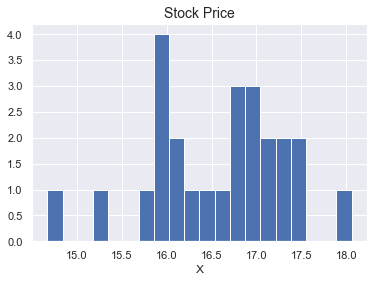

In [11]:
my_hist = open_histogram(df,'AA')
plt.show()
plt.close()

In [12]:
assert_is_instance(my_hist, mpl.axes.Axes, msg='Return a matplotlib axes object.')  
assert_is_not(len(my_hist.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(my_hist.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_equal(my_hist.patches[0].get_bbox().get_points()[0][0],14.67,
             msg="The number of bins may not be correct, or the function is using the wrong ticker name")

# Problem 4: Comparing the open price of quarter 1 and quarter 2


The Dow Jones dataset contains a column called *quarter*, which corresponds to either the 1st or 2nd quarter of the year. We will create multiple boxplots to see if the distribution of opening prices in quarter 1 is different from the distribution of opening prices in quarter 2.

- Create two boxplots (in the same plot) using seaborn of the columns *quarter* and *open* from the Dow Jones dataset.


- The *quarter* variable should be on the x-axis


- The *open* variable should be on the y-axis


- Create a label for the y axis and the x axis


- Set a title for your plot



In [13]:
def plot_compare_boxplot(df):
    '''
    A function which plots two boxplots to compare how the opening price changes based on the quarter.
    
    
    Parameters
    -------
    df: a pandas dataframe containing stock price data
    
    
    Returns
    --------
    
    ax: a matplotlib axes object containing a boxplot
    
    '''    
    
    # YOUR CODE HERE
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.boxplot(x=df['quarter'], y=df['open'], data=df, ax=ax)
    sns.boxplot(x=df['quarter'], y=df['open'], data=df, ax=ax)
    ax.set_title("Comparing the open price of quarter 1 and quarter 2")
    return ax

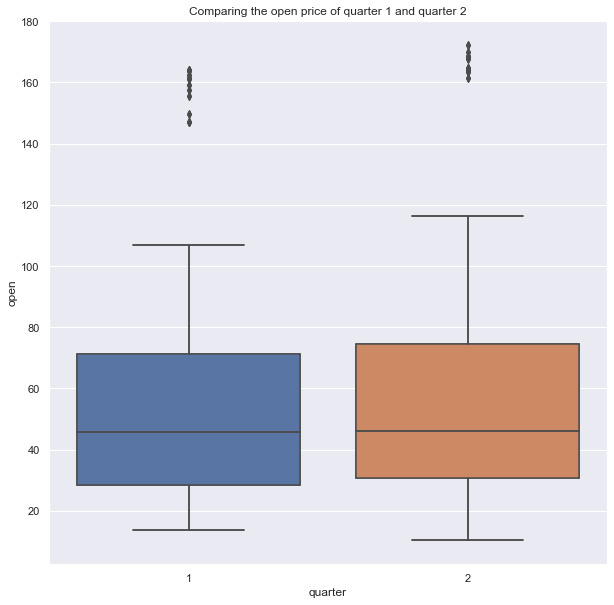

In [14]:
cb = plot_compare_boxplot(df)

In [15]:
assert_is_instance(cb, mpl.axes.Axes, msg='Return a matplotlib axes object.')  
assert_is_not(len(cb.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(cb.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(cb.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")
assert_equal(cb.get_data_ratio(),88.836,
             msg="The function is either plotting the wrong columns or quarter is not on the x-axis.")